# Using the Naive Bayes Classifier (also supervised)

(This notebook was created for a workshop at RV College of Engineering on 6th Sep 2021)

Consider an example : 

- X is a 30 year old customer who wants to buy a computer.
- His salary is Rs. 80000

Here age and salary are 2 attributes - `x1` and `x2`. 

Let's say `H` is the hypothesis that a customer will buy a computer. 
And `C` is the class of Computer buyers. 

We want to find the probability of X belonging to `C` i.e `P(H|X)` - termed A Posteriori Probability

Here, the probability that any customer regardless of age or salary purchasing a computer is `P(H)` - the A Priori Probability of a computer being purchased

- Similarly, `P(X|H)` is the A posteriori probability of X conditioned
on H. That is, it is the probability of a customer X being 30 years
old and earning Rs.80000, given that we know X will buy a
computer.

P(X) is the A priori probability of X being 30 years old and earning Rs.80000. 


According to Bayes’ theorem, the probability that we want to
compute `P(H|X)` can be expressed in terms of probabilities P(H),
P(X|H), and P(X) as

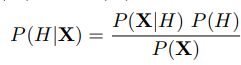


**Terms learnt :**

- A Priori Probability
- Hypothesis
- A Posteriori Probability
- Likelihood


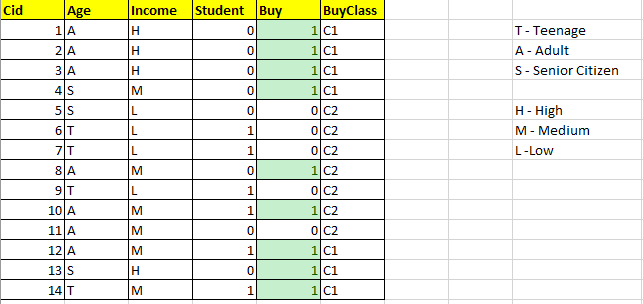

The data samples are described by attributes age, income and student. 
The BuyClass label attribute, buy, tells whether the person buys a computer, has two distinct values, 1 (class C1) and 0 (class
C2).
The sample we want to classify i.e. **test** is
X = (age = A, income = H, student = 0)
We need to maximize P(X|Ci)P(Ci), for i = 1, 2.

P(Ci), the A Priori probability of each class, can be estimated based on the training samples:

  - `P(buy = 1) = 9/14`
  - `P(buy = 0) = 5/14`

To compute P(X|Ci), for i = 1, 2, we compute the following conditional probabilities:

- `P(age = A|buy = yes) ` $= 6/9$
- `P(age = A|buy = no) ` $= 1/5$
- `P(income = H|buy = yes) ` $= 4/9$
- `P(income = H|buy = no)` $= 0/5$
- `P(student = 0|buy = yes)` $= 6/9$
- `P(student = 0|buy = no) ` $=2/5$

Using the above probabilities, we obtain

P(X|buy = yes) = 

$P(age = A|buy = yes) * P(income = H|buy = yes) * P(student = 0|buy = yes)$ 
= $(6/9) * (4/9) * (6/9)$  = 324/729 = 0.44

P(X|buy = no) = 0

To find the class that **Maximizes** P(X|Ci)P(Ci), we compute

- $P(X|buy = yes) * P(buy = yes) = 0.44 * (9/14) = 0.28$
- $P(X|buy = no) * P(buy = no) = 0 * (5/14) = 0$

Therefore, the Naive Bayes Classifier predicts that the Man who is an Adult, with a high income and is not a student will buy a Computer. 

## Install libraries

In [ ]:
# install nltk
!pip install nltk
!pip install pandas
# install gensim
!pip install gensim
!pip install seaborn
!pip install scikit-learn
# install wordcloud
!pip install wordcloud

You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
resume_df = pd.read_csv("https://raw.githubusercontent.com/abhiramr/ML_Workshop_RVCE/main/naive_bayes/resume.csv", encoding='latin-1')

In [ ]:
resume_df.shape

(125, 3)

In [ ]:
# data containing resume
resume_df[["resume_text","class"]]
resume_df = resume_df[["class","resume_text"]]

In [ ]:
# Question - Print the top 5 and last 5 rows of the dataframe
resume_df.iloc[0:5,-5:-1]



,class
0,not_flagged
1,not_flagged
2,not_flagged
3,not_flagged
4,flagged


In [ ]:
resume_df.iloc[[0,]] #append 

,class,resume_text
0,not_flagged,\rCustomer Service Supervisor/Tier - Isabella ...


## Perform EDA

In [ ]:
# obtain dataframe information
resume_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   class        125 non-null    object
 1   resume_text  125 non-null    object
dtypes: object(2)
memory usage: 2.1+ KB


In [ ]:
# check for null values
resume_df.isnull().sum()

class          0
resume_text    0
dtype: int64

In [ ]:
resume_df['class'].value_counts()

not_flagged    92
flagged        33
Name: class, dtype: int64

In [ ]:
resume_df["class"] = resume_df["class"].apply(lambda i:1 if i=="flagged" else 0)

In [ ]:
# Question! - Can you divide the DataFrame into two smaller DFs? - One that belongs to class 0 and one that belongs to class 1. 
resume_df1 = resume_df[resume_df['class']==1]

`resume_df1.value_counts()`

## Perform Data Cleaning

`resume_df['resume_text'].head()`

In [ ]:
resume_df['resume_text'] = resume_df['resume_text'].apply(lambda x: x.replace('\r',''))

In [ ]:
resume_df['resume_text'].head()

0    Customer Service Supervisor/Tier - Isabella Ca...
1    Engineer / Scientist - IBM Microelectronics Di...
2    LTS Software Engineer Computational Lithograph...
3     TUTORWilliston VT - Email me on Indeed: indee...
4    Independent Consultant - Self-employedBurlingt...
Name: resume_text, dtype: object

In [ ]:
# download nltk packages
nltk.download('punkt')
nltk.download("stopwords")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Get additional stopwords from nltk
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

In [ ]:
# Remove stop words and remove words with 2 or less characters
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text) :
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 2 and token not in stop_words:
            result.append(token)
            
    return ' '.join(result)

In [ ]:
# Cleaned text into a new column
resume_df["cleaned"] = resume_df["resume_text"].apply(preprocess)

## Visualize Cleaned Dataset

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='class', ylabel='count'>

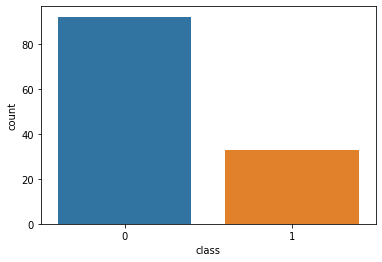

In [ ]:
# Plot the counts of flagged vs not flagged
sns.countplot(resume_df["class"], label = "Count Plot")

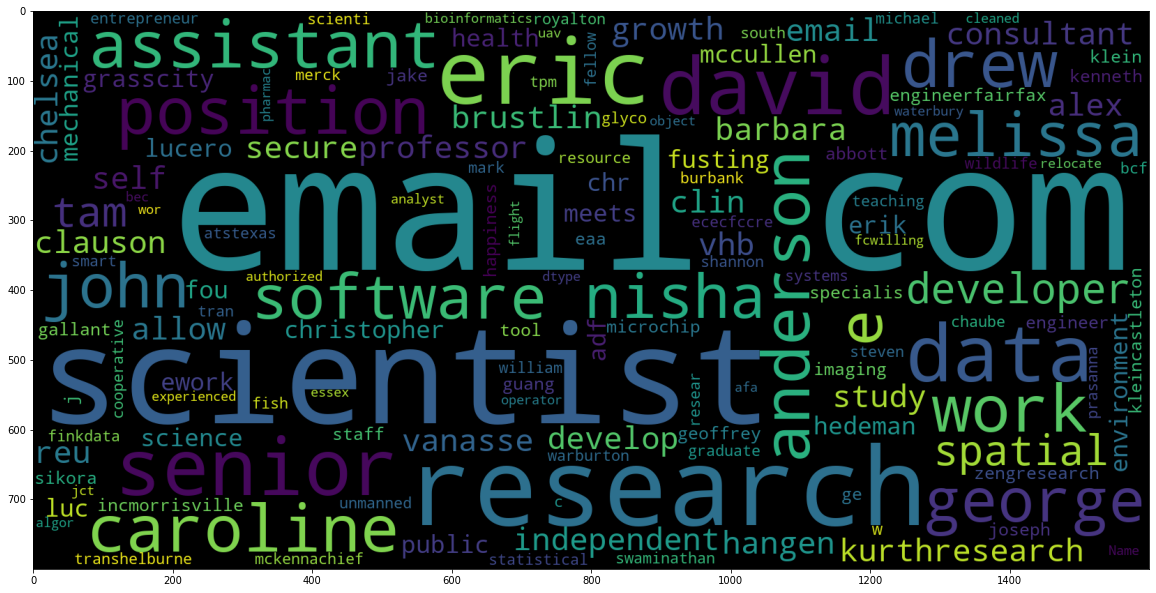

In [ ]:
# plot the word cloud for text that is flagged
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words=2000, width=1600, height=800, stopwords=stop_words).generate(str(resume_df[resume_df['class']==1].cleaned))
plt.imshow(wc)

In [ ]:
# Question - Plot the wordcloud for class 0

## Prepare the Data by Applying Count Tokenizer

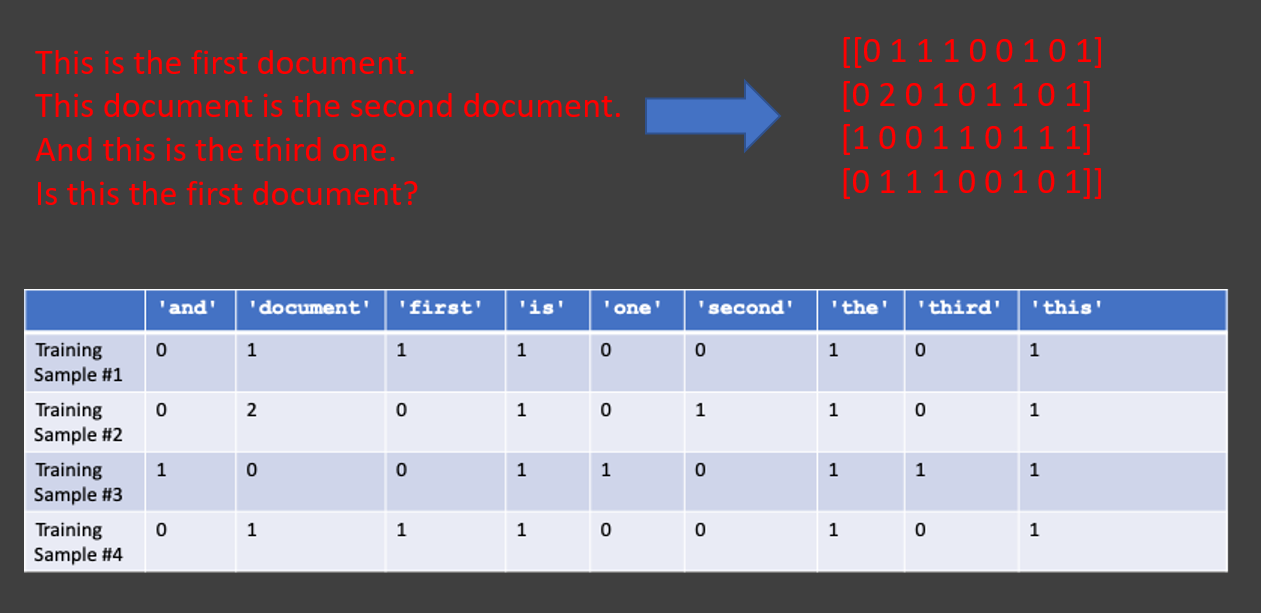

In [ ]:
# CountVectorizer example
from sklearn.feature_extraction.text import CountVectorizer
sample_data = ['This is the first document.','This document is the second document.','And this is the third one.','Is this the first document?']

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(sample_data)

In [ ]:
print(vectorizer.get_feature_names())
print(X.toarray())

['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']
[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]


In [ ]:
# Applying CountVectorier to the cleaned text
vectorizer = CountVectorizer()
c = vectorizer.fit_transform(resume_df['cleaned'])
print(vectorizer.get_feature_names())
print(c.toarray())

#pd.set_option('display.max_cols', 50000)


['aaalac', 'aabb', 'aac', 'aacn', 'aacr', 'aacrjournals', 'aakeroõ_y', 'aanpcp', 'aaron', 'abbott', 'abdomen', 'abdominal', 'abdul', 'aberdeen', 'abi', 'abilities', 'ability', 'abiotic', 'able', 'abnormal', 'aboard', 'abosalem', 'abraham', 'abreast', 'abs', 'absence', 'absorbance', 'abstract', 'abstracta', 'abstractdisease', 'abstracted', 'abstractin', 'abstracts', 'abualrub', 'abundance', 'abureehan', 'abuse', 'abusiness', 'academia', 'academic', 'academics', 'academy', 'acaeefbc', 'accelerated', 'accept', 'acceptability', 'acceptable', 'acceptance', 'accepted', 'accepting', 'access', 'accessibility', 'accessible', 'accession', 'accident', 'accidents', 'accolateî', 'accommodations', 'accomplished', 'accomplishment', 'accomplishments', 'accord', 'accordance', 'according', 'accordingly', 'accords', 'account', 'accountability', 'accountable', 'accounted', 'accounting', 'accounts', 'accreditation', 'accredited', 'accrual', 'accumulation', 'accuracy', 'accurate', 'accurately', 'accustomed'

## Train Naive Bayes Classifier Model

In [ ]:
X = c
y = resume_df['class']

In [ ]:
X.shape

(125, 11319)

In [ ]:
y.shape

(125,)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB()

<AxesSubplot:>

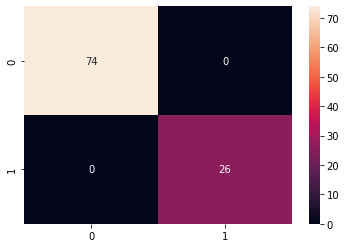

In [ ]:
# Predicting the performance on train data
y_predict_train = NB_classifier.predict(X_train)
y_predict_train
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot = True)

<AxesSubplot:>

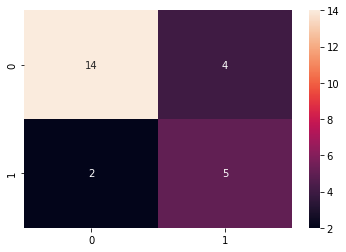

In [ ]:
# Predicting the Test set results
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot = True)

In [ ]:
# Question - What happens if you tweak the test-train split?

## Interpreting a confusion Matrix
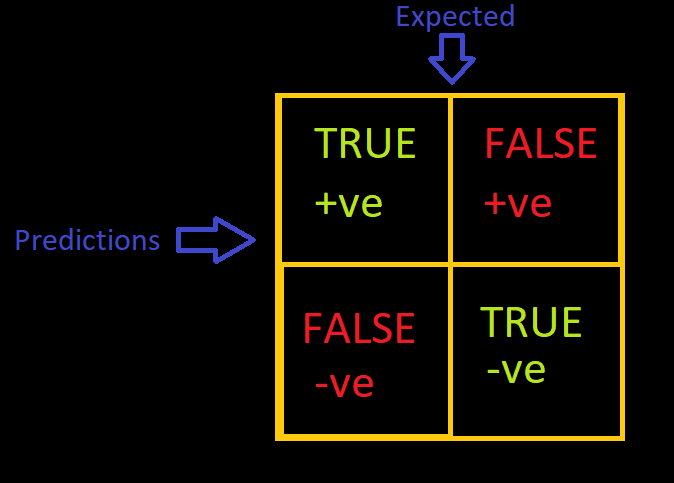

## More References

- https://jakevdp.github.io/PythonDataScienceHandbook/05.05-naive-bayes.html